# Final Data Processing

### Main Data : train, test

In [311]:
import numpy as np
import pandas as pd

import warnings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings('ignore')

In [312]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [313]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [314]:
train['weekday'] = train['date'].dt.dayofweek + 1 # 1: 월요일, 7:일요일

train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

test['weekday'] = test['date'].dt.dayofweek + 1 # 1: 월요일, 7:일요일

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

In [315]:
# store_nbr, weekday, month, day 열의 데이터 타입을 int8로 변환
train['store_nbr'] = train['store_nbr'].astype('int8')
train['weekday'] = train['weekday'].astype('int8')
train['month'] = train['month'].astype('int8')
train['day'] = train['day'].astype('int8')

test['store_nbr'] = test['store_nbr'].astype('int8')
test['weekday'] = test['weekday'].astype('int8')
test['month'] = test['month'].astype('int8')
test['day'] = test['day'].astype('int8')

In [316]:
test.head()

,id,date,store_nbr,family,onpromotion,weekday,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,3,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,3,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,3,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,3,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,3,2017,8,16


In [317]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int8          
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   weekday      28512 non-null  int8          
 6   year         28512 non-null  int32         
 7   month        28512 non-null  int8          
 8   day          28512 non-null  int8          
dtypes: datetime64[ns](1), int32(1), int64(2), int8(4), object(1)
memory usage: 1.1+ MB


In [318]:
train = train[train['sales']!=0.0]
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061758 entries, 563 to 3000887
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int8          
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   weekday      int8          
 7   year         int32         
 8   month        int8          
 9   day          int8          
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), int8(4), object(1)
memory usage: 110.1+ MB


### transaction 처리

In [250]:
transactions = pd.read_csv("../data//transactions.csv")
transactions['date'] = pd.to_datetime(transactions['date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [251]:
# 데이터프레임 병합
train_transactions = pd.merge(train, transactions, on=['date', 'store_nbr'], how='left')

# 결과 출력
train_transactions

,id,date,store_nbr,family,sales,onpromotion,weekday,year,month,day,transactions
0,563,2013-01-01,25,BEAUTY,2.000,0,2,2013,1,1,770.000
1,564,2013-01-01,25,BEVERAGES,810.000,0,2,2013,1,1,770.000
2,566,2013-01-01,25,BREAD/BAKERY,180.589,0,2,2013,1,1,770.000
3,568,2013-01-01,25,CLEANING,186.000,0,2,2013,1,1,770.000
4,569,2013-01-01,25,DAIRY,143.000,0,2,2013,1,1,770.000
...,...,...,...,...,...,...,...,...,...,...,...
2061753,3000883,2017-08-15,9,POULTRY,438.133,0,2,2017,8,15,2155.000
2061754,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2,2017,8,15,2155.000
2061755,3000885,2017-08-15,9,PRODUCE,2419.729,148,2,2017,8,15,2155.000
2061756,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2,2017,8,15,2155.000


In [255]:
train_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061758 entries, 0 to 2061757
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int8          
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   weekday       int8          
 7   year          int32         
 8   month         int8          
 9   day           int8          
 10  transactions  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), int8(4), object(1)
memory usage: 110.1+ MB


In [252]:
missing_sales = train_transactions['sales'].isnull().sum()
sales_zero_count = train_transactions[train_transactions['sales'] == 0.0].shape[0]

missing_transactions = train_transactions['transactions'].isnull().sum()
transactions_zero_count = train_transactions[train_transactions['transactions'] == 0.0].shape[0]

print(f"Missing sales : {missing_sales}, Number of rows with sales value of 0: {sales_zero_count}")
print(f"Missing transactions : {missing_transactions}, Number of rows with transactions value of 0: {transactions_zero_count}")


Missing sales : 0, Number of rows with sales value of 0: 0
Missing transactions : 3248, Number of rows with transactions value of 0: 0


In [257]:
# date와 store_nbr로 그룹화하여 sales 합계 계산
grouped_sales = train_transactions.groupby(['date', 'store_nbr'])['sales'].sum().reset_index()

# 결과 확인
grouped_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83606 entries, 0 to 83605
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       83606 non-null  datetime64[ns]
 1   store_nbr  83606 non-null  int8          
 2   sales      83606 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int8(1)
memory usage: 1.4 MB


In [258]:
# 데이터프레임 병합
df_merged = pd.merge(grouped_sales, transactions, on=['date', 'store_nbr'], how='left')

# transactions 값이 없는 경우 처리
def fill_transactions(row):
    if np.isnan(row['transactions']):
        start_date = row['date'] - pd.Timedelta(days=3)
        end_date = row['date'] + pd.Timedelta(days=3)
        mask = (df_merged['date'] >= start_date) & (df_merged['date'] <= end_date) & (df_merged['store_nbr'] == row['store_nbr'])
        relevant_rows = df_merged[mask]
        if len(relevant_rows) > 0:
            avg_ratio = (relevant_rows['transactions'] / relevant_rows['sales']).mean()
            return row['sales'] * avg_ratio
    return row['transactions']

df_merged['transactions'] = df_merged.apply(fill_transactions, axis=1)

# 결과 확인
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83606 entries, 0 to 83605
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83606 non-null  datetime64[ns]
 1   store_nbr     83606 non-null  int8          
 2   sales         83606 non-null  float64       
 3   transactions  83606 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int8(1)
memory usage: 2.0 MB


In [259]:
# 데이터프레임 병합
train_transact_appro = pd.merge(train, df_merged, on=['date', 'store_nbr'], how='left')

# 결과 출력


,id,date,store_nbr,family,sales_x,onpromotion,weekday,year,month,day,sales_y,transactions
0,563,2013-01-01,25,BEAUTY,2.000,0,2,2013,1,1,2511.619,770.000
1,564,2013-01-01,25,BEVERAGES,810.000,0,2,2013,1,1,2511.619,770.000
2,566,2013-01-01,25,BREAD/BAKERY,180.589,0,2,2013,1,1,2511.619,770.000
3,568,2013-01-01,25,CLEANING,186.000,0,2,2013,1,1,2511.619,770.000
4,569,2013-01-01,25,DAIRY,143.000,0,2,2013,1,1,2511.619,770.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2061753,3000883,2017-08-15,9,POULTRY,438.133,0,2,2017,8,15,18636.477,2155.000
2061754,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2,2017,8,15,18636.477,2155.000
2061755,3000885,2017-08-15,9,PRODUCE,2419.729,148,2,2017,8,15,18636.477,2155.000
2061756,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2,2017,8,15,18636.477,2155.000


In [260]:
train_transact_appro.drop(columns=['sales_y'], inplace=True)
train_transact_appro.rename(columns={'sales_x': 'sales'}, inplace=True)

In [262]:
missing_transactions = train_transact_appro['transactions'].isnull().sum()
transactions_zero_count = train_transact_appro[train_transact_appro['transactions'] == 0.0].shape[0]

print(f"Missing transactions : {missing_transactions}, Number of rows with transactions value of 0: {transactions_zero_count}")

Missing transactions : 0, Number of rows with transactions value of 0: 0


In [263]:
train_transact_appro.head(-10)

,id,date,store_nbr,family,sales,onpromotion,weekday,year,month,day,transactions
0,563,2013-01-01,25,BEAUTY,2.000,0,2,2013,1,1,770.000
1,564,2013-01-01,25,BEVERAGES,810.000,0,2,2013,1,1,770.000
2,566,2013-01-01,25,BREAD/BAKERY,180.589,0,2,2013,1,1,770.000
3,568,2013-01-01,25,CLEANING,186.000,0,2,2013,1,1,770.000
4,569,2013-01-01,25,DAIRY,143.000,0,2,2013,1,1,770.000
...,...,...,...,...,...,...,...,...,...,...,...
2061743,3000873,2017-08-15,9,HOME CARE,373.000,6,2,2017,8,15,2155.000
2061744,3000874,2017-08-15,9,LADIESWEAR,10.000,0,2,2017,8,15,2155.000
2061745,3000875,2017-08-15,9,LAWN AND GARDEN,11.000,3,2,2017,8,15,2155.000
2061746,3000876,2017-08-15,9,LINGERIE,6.000,0,2,2017,8,15,2155.000


### Family data
Family를 Others 로 정리 : 필요가 없을시 실행하지 말것!!

In [110]:
family_rank = train.groupby("family").sales.mean().sort_values(ascending = False).reset_index()

In [117]:
# 전체 sales의 99.9% 기준 계산
total_sales = family_rank['sales'].sum()
cumulative_sales = family_rank['sales'].cumsum()
threshold = total_sales * 0.99 # 1: 전체 상품권, 0.99 : 99프로 판매 상품군

# 95%를 차지하는 품목 식별
family_rank['cumulative_sales'] = cumulative_sales
top_99 = family_rank[family_rank['cumulative_sales'] <= threshold]
top_99_families = top_99['family'].unique()

# 나머지 품목 합산하여 OTHERS로 처리
others = family_rank[family_rank['cumulative_sales'] > threshold]
others_sum = others['sales'].sum()

# 결과 데이터프레임 생성
result = top_99[['family', 'sales']].copy()
others_row = pd.DataFrame([{'family': 'OTHERS', 'sales': others_sum}])
result = pd.concat([result, others_row], ignore_index=True)

result

,family,sales
0,GROCERY I,4108.209
1,BEVERAGES,2594.994
2,PRODUCE,1883.389
3,CLEANING,1166.453
4,DAIRY,771.338
5,BREAD/BAKERY,503.958
6,POULTRY,381.328
7,MEATS,371.825
8,HOME CARE,298.181
9,PERSONAL CARE,294.156


In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int8          
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   weekday      28512 non-null  int8          
 6   year         28512 non-null  int32         
 7   month        28512 non-null  int8          
 8   day          28512 non-null  int8          
dtypes: datetime64[ns](1), int32(1), int64(2), int8(4), object(1)
memory usage: 1.1+ MB


In [122]:
test.head()

,id,date,store_nbr,family,onpromotion,weekday,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,3,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,3,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,3,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,3,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,3,2017,8,16


In [120]:
# date와 store_nbr로 그룹화하여 family 항목 개수 계산
grouped_df = test.groupby(['date', 'store_nbr'])['family'].apply(lambda x: x.isin(top_99_families).sum()).reset_index(name='family_count')

# 결과 확인
print(grouped_df.head())
print(f"Total number of entries with the specified families: {grouped_df['family_count'].sum()}")

        date  store_nbr  family_count
0 2017-08-16          1            18
1 2017-08-16          2            18
2 2017-08-16          3            18
3 2017-08-16          4            18
4 2017-08-16          5            18
Total number of entries with the specified families: 15552


In [65]:
# family가 top_95 목록에 없으면 'OTHERS'로 변경
train['family'] = train['family'].apply(lambda x: x if x in top_99_families else 'OTHERS')

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [67]:
# 'date'와 'store_nbr'로 그룹화하고, 'family'가 'OTHERS'인 경우를 처리
def process_group(group):
    if 'OTHERS' in group['family'].values:
        # 'OTHERS'에 해당하는 'sales'와 'onpromotion' 값 합산
        others_sales_sum = group[group['family'] == 'OTHERS']['sales'].sum()
        others_onpromotion_sum = group[group['family'] == 'OTHERS']['onpromotion'].sum()
        # 'OTHERS' 중 첫 번째 항목만 남기고 나머지는 삭제
        first_others_idx = group[group['family'] == 'OTHERS'].index[0]
        group = group.drop(group[group['family'] == 'OTHERS'].index[1:])
        # 남은 'OTHERS'의 'sales'와 'onpromotion' 값을 합산된 값으로 업데이트
        group.loc[first_others_idx, 'sales'] = others_sales_sum
        group.loc[first_others_idx, 'onpromotion'] = others_onpromotion_sum
    return group

# 그룹별로 처리
train_pre = train.groupby(['date', 'store_nbr']).apply(process_group).reset_index(drop=True)
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454976 entries, 0 to 1454975
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1454976 non-null  int64         
 1   date         1454976 non-null  datetime64[ns]
 2   store_nbr    1454976 non-null  int64         
 3   family       1454976 non-null  object        
 4   sales        1454976 non-null  float64       
 5   onpromotion  1454976 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 66.6+ MB


In [68]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454976 entries, 0 to 1454975
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1454976 non-null  int64         
 1   date         1454976 non-null  datetime64[ns]
 2   store_nbr    1454976 non-null  int64         
 3   family       1454976 non-null  object        
 4   sales        1454976 non-null  float64       
 5   onpromotion  1454976 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 66.6+ MB


In [72]:
# sales 값이 0인 행 삭제
train_transactions = train_transactions[train_transactions['sales'] != 0.0]

# transactions의 null 값을 0으로 설정
train_transactions['transactions'].fillna(0, inplace=True)

# 결과 확인
missing_sales = train_transactions['sales'].isnull().sum()
sales_zero_count = train_transactions[train_transactions['sales'] == 0.0].shape[0]

missing_transactions = train_transactions['transactions'].isnull().sum()
transactions_zero_count = train_transactions[train_transactions['transactions'] == 0.0].shape[0]

print(f"Missing sales : {missing_sales}, Number of rows with sales value of 0: {sales_zero_count}")
print(f"Missing transactions : {missing_transactions}, Number of rows with transactions value of 0: {transactions_zero_count}")

Missing sales : 0, Number of rows with sales value of 0: 0
Missing transactions : 0, Number of rows with transactions value of 0: 1826


In [73]:
# 인덱스 재설정
train_transactions.reset_index(drop=True, inplace=True)

In [74]:
train_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280373 entries, 0 to 1280372
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   id            1280373 non-null  int64         
 1   date          1280373 non-null  datetime64[ns]
 2   store_nbr     1280373 non-null  int64         
 3   family        1280373 non-null  object        
 4   sales         1280373 non-null  float64       
 5   onpromotion   1280373 non-null  int64         
 6   transactions  1280373 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 68.4+ MB


300만개 데이터를 128만개로 줄임

### holidays_events 처리

In [264]:
holidays_events = pd.read_csv("../data//holidays_events.csv")
holidays_events['date'] = pd.to_datetime(transactions['date'])
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


##### preprocessing 결과 locale과 type에 다른 변수에 따라 영향을 받지 않으므로 단순히 holday 가 있는 날은 0, 없는 날을 1로 세팅

In [265]:
train_transact_appro['is_holiday'] = train_transact_appro['date'].isin(holidays_events['date']).astype(int)

In [266]:
train_transact_appro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061758 entries, 0 to 2061757
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int8          
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   weekday       int8          
 7   year          int32         
 8   month         int8          
 9   day           int8          
 10  transactions  float64       
 11  is_holiday    int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), int8(4), object(1)
memory usage: 125.8+ MB


### store 데이터 처리

In [267]:
stores = pd.read_csv("../data//stores.csv")
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [268]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [269]:
train_stores = pd.merge(train_transact_appro, stores, on='store_nbr', how='left')

In [270]:
train_stores

,id,date,store_nbr,family,sales,onpromotion,weekday,year,month,day,transactions,is_holiday,city,state,type,cluster
0,563,2013-01-01,25,BEAUTY,2.000,0,2,2013,1,1,770.000,1,Salinas,Santa Elena,D,1
1,564,2013-01-01,25,BEVERAGES,810.000,0,2,2013,1,1,770.000,1,Salinas,Santa Elena,D,1
2,566,2013-01-01,25,BREAD/BAKERY,180.589,0,2,2013,1,1,770.000,1,Salinas,Santa Elena,D,1
3,568,2013-01-01,25,CLEANING,186.000,0,2,2013,1,1,770.000,1,Salinas,Santa Elena,D,1
4,569,2013-01-01,25,DAIRY,143.000,0,2,2013,1,1,770.000,1,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061753,3000883,2017-08-15,9,POULTRY,438.133,0,2,2017,8,15,2155.000,0,Quito,Pichincha,B,6
2061754,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2,2017,8,15,2155.000,0,Quito,Pichincha,B,6
2061755,3000885,2017-08-15,9,PRODUCE,2419.729,148,2,2017,8,15,2155.000,0,Quito,Pichincha,B,6
2061756,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2,2017,8,15,2155.000,0,Quito,Pichincha,B,6


In [271]:
# city와 state 컬럼 삭제
train_stores.drop(columns=['city', 'state'], inplace=True)

train_stores.head()

,id,date,store_nbr,family,sales,onpromotion,weekday,year,month,day,transactions,is_holiday,type,cluster
0,563,2013-01-01,25,BEAUTY,2.000,0,2,2013,1,1,770.000,1,D,1
1,564,2013-01-01,25,BEVERAGES,810.000,0,2,2013,1,1,770.000,1,D,1
2,566,2013-01-01,25,BREAD/BAKERY,180.589,0,2,2013,1,1,770.000,1,D,1
3,568,2013-01-01,25,CLEANING,186.000,0,2,2013,1,1,770.000,1,D,1
4,569,2013-01-01,25,DAIRY,143.000,0,2,2013,1,1,770.000,1,D,1


#### oil data

In [284]:
oil = pd.read_csv("../data/oil.csv")
oil['date'] = pd.to_datetime(oil['date'])

In [273]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [274]:
# Resample
oil = oil.set_index("date").dcoilwtico.resample("D").sum().reset_index()
# Interpolate
oil["dcoilwtico"] = np.where(oil["dcoilwtico"] == 0, np.nan, oil["dcoilwtico"])
oil["dcoilwtico_interpolated"] =oil.dcoilwtico.interpolate()
oil.drop(columns=['dcoilwtico'], inplace=True)
oil['dcoilwtico_interpolated'] = oil['dcoilwtico_interpolated'].fillna(method='bfill')
oil.head()



,date,dcoilwtico_interpolated
0,2013-01-01,93.140
1,2013-01-02,93.140
2,2013-01-03,92.970
3,2013-01-04,93.120
4,2013-01-05,93.147


In [275]:
train_all = pd.merge(train_stores, oil, on='date', how='left')
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061758 entries, 0 to 2061757
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   date                     datetime64[ns]
 2   store_nbr                int8          
 3   family                   object        
 4   sales                    float64       
 5   onpromotion              int64         
 6   weekday                  int8          
 7   year                     int32         
 8   month                    int8          
 9   day                      int8          
 10  transactions             float64       
 11  is_holiday               int64         
 12  type                     object        
 13  cluster                  int64         
 14  dcoilwtico_interpolated  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), int8(4), object(2)
memory usage: 173.0+ MB


In [276]:
# 이동 평균 및 이동 표준 편차 계산
train_all['Rolling_Mean_Sales_14d'] = train_all['transactions'].rolling(window=14, min_periods=1).mean()
train_all['Rolling_Std_Sales_14d'] = train_all['transactions'].rolling(window=14, min_periods=1).std()

train_all['Rolling_Mean_Sales_28d'] = train_all['transactions'].rolling(window=28, min_periods=1).mean()
train_all['Rolling_Std_Sales_28d'] = train_all['transactions'].rolling(window=28, min_periods=1).std()


# 결측치를 다음 값으로 채우기
train_all['Rolling_Mean_Sales_14d'].fillna(method='bfill', inplace=True)
train_all['Rolling_Std_Sales_14d'].fillna(method='bfill', inplace=True)

train_all['Rolling_Mean_Sales_28d'].fillna(method='bfill', inplace=True)
train_all['Rolling_Std_Sales_28d'].fillna(method='bfill', inplace=True)

In [277]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061758 entries, 0 to 2061757
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   date                     datetime64[ns]
 2   store_nbr                int8          
 3   family                   object        
 4   sales                    float64       
 5   onpromotion              int64         
 6   weekday                  int8          
 7   year                     int32         
 8   month                    int8          
 9   day                      int8          
 10  transactions             float64       
 11  is_holiday               int64         
 12  type                     object        
 13  cluster                  int64         
 14  dcoilwtico_interpolated  float64       
 15  Rolling_Mean_Sales_14d   float64       
 16  Rolling_Std_Sales_14d    float64       
 17  Rolling_Mean_Sales_28d   fl

In [278]:
train_all.to_csv('train_all.csv', index=False)

In [279]:
missing_transactions = train_all['transactions'].isnull().sum()
transactions_zero_count = train_all[train_all['transactions'] == 0.0].shape[0]

print(f"Missing transactions : {missing_transactions}, Number of rows with transactions value of 0: {transactions_zero_count}")

Missing transactions : 0, Number of rows with transactions value of 0: 0


In [6]:
train_all = pd.read_csv("./train_all.csv")

In [32]:
# 2017년 1월부터 12월까지의 데이터 필터링
train_2017 = train_all[(train_all.date >= '2017-01-01') & (train_all.date <= '2017-07-31')]
train_2016 = train_all[(train_all.date >= '2016-01-01') & (train_all.date <= '2016-12-31')]
train_2015 = train_all[(train_all.date >= '2015-01-01') & (train_all.date <= '2015-12-31')]
train_2014 = train_all[(train_all.date >= '2014-01-01') & (train_all.date <= '2014-12-31')]
train_2013 = train_all[(train_all.date >= '2013-01-01') & (train_all.date <= '2013-12-31')]

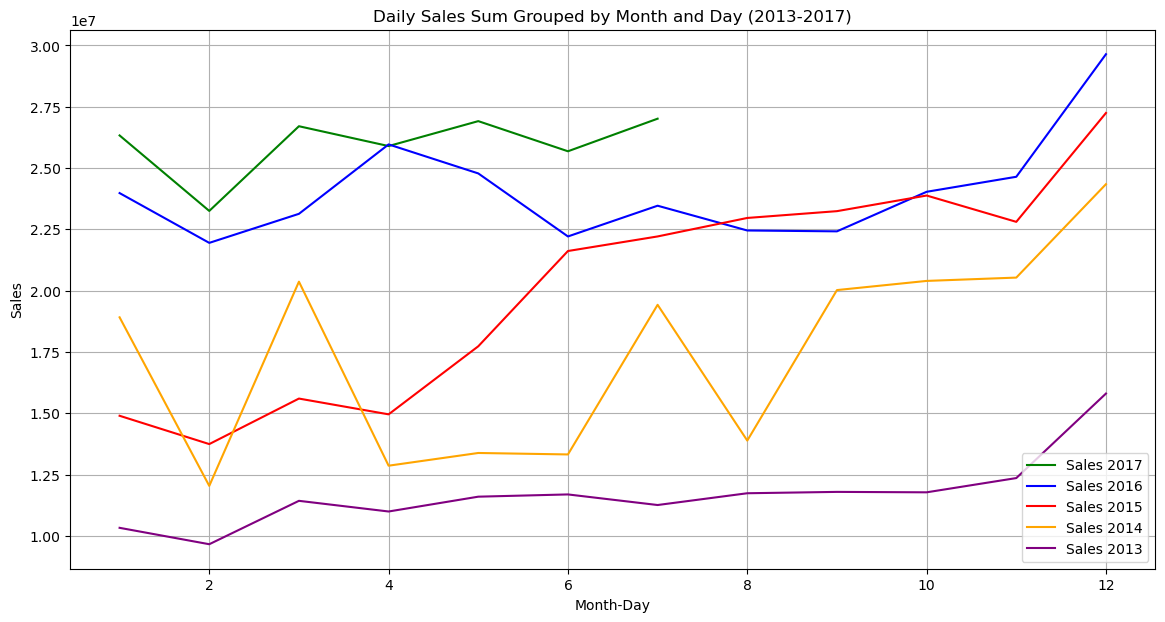

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 날짜별 store_nbr을 groupby 해서 해당 날짜의 sales 합계 계산
train_2017_grouped = train_2017.groupby('month')['sales'].sum().reset_index()
train_2016_grouped = train_2016.groupby('month')['sales'].sum().reset_index()
train_2015_grouped = train_2015.groupby('month')['sales'].sum().reset_index()
train_2014_grouped = train_2014.groupby('month')['sales'].sum().reset_index()
train_2013_grouped = train_2013.groupby('month')['sales'].sum().reset_index()

# 날짜별 sales 합계를 나타내는 라인 그래프 그리기
plt.figure(figsize=(14, 7))

plt.plot(train_2017_grouped['month'], train_2017_grouped['sales'], label='Sales 2017', color='green')
plt.plot(train_2016_grouped['month'], train_2016_grouped['sales'], label='Sales 2016', color='blue')
plt.plot(train_2015_grouped['month'], train_2015_grouped['sales'], label='Sales 2015', color='red')
plt.plot(train_2014_grouped['month'], train_2014_grouped['sales'], label='Sales 2014', color='orange')
plt.plot(train_2013_grouped['month'], train_2013_grouped['sales'], label='Sales 2013', color='purple')

plt.xlabel('Month-Day')
plt.ylabel('Sales')
plt.title('Daily Sales Sum Grouped by Month and Day (2013-2017)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
import plotly.graph_objects as go

# 새로운 그래프 객체 생성
fig = go.Figure()

# 2017년 데이터 추가
fig.add_trace(go.Scatter(x=train_2017_grouped['month'], y=train_2017_grouped['sales'],
                         mode='lines+markers', name='Sales 2017', line=dict(color='green')))

# 2016년 데이터 추가
fig.add_trace(go.Scatter(x=train_2016_grouped['month'], y=train_2016_grouped['sales'],
                         mode='lines+markers', name='Sales 2016', line=dict(color='blue')))

# 2015년 데이터 추가
fig.add_trace(go.Scatter(x=train_2015_grouped['month'], y=train_2015_grouped['sales'],
                         mode='lines+markers', name='Sales 2015', line=dict(color='red')))

# 2014년 데이터 추가
fig.add_trace(go.Scatter(x=train_2014_grouped['month'], y=train_2014_grouped['sales'],
                         mode='lines+markers', name='Sales 2014', line=dict(color='orange')))

# 2013년 데이터 추가
fig.add_trace(go.Scatter(x=train_2013_grouped['month'], y=train_2013_grouped['sales'],
                         mode='lines+markers', name='Sales 2013', line=dict(color='purple')))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Daily Sales Sum Grouped by Month (2013-2017)',
    xaxis_title='Month',
    yaxis_title='Sales',
    legend_title='Year',
    template='plotly_white'
)

# 그래프 출력
fig.show()

In [40]:
predict = pd.read_csv("./test_2017.csv")
predict['date'] = pd.to_datetime(predict['date'])
predict.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   28512 non-null  int64         
 1   id           28512 non-null  int64         
 2   date         28512 non-null  datetime64[ns]
 3   store_nbr    28512 non-null  int64         
 4   family       28512 non-null  object        
 5   onpromotion  28512 non-null  int64         
 6   sales        28512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.5+ MB


In [42]:
predict = pd.read_csv("./test_2017.csv")
predict['date'] = pd.to_datetime(predict['date'])

test_2017 = train_all[(train_all.date >= '2017-07-01') & (train_all.date <= '2017-08-31')]
test_2017['date'] = pd.to_datetime(test_2017['date'])
date_sales_sum = predict.groupby('date')['sales'].sum().reset_index()


# 일별 판매량 계산
test_2017_grouped = test_2017.groupby(test_2017['date'])['sales'].sum().reset_index()

# store_nbr 별 판매량 계산
store_sales_2017 = test_2017.groupby(['store_nbr', test_2017['date']])['sales'].sum().reset_index()

# 첫 번째 그래프: 일별 판매량 라인 그래프
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=test_2017_grouped['date'], y=test_2017_grouped['sales'],
                          mode='lines+markers', name='Daily Sales August 2017',
                          line=dict(color='green')))
# 새로운 데이터를 기존 그래프에 추가
fig1.add_trace(go.Scatter(
    x=date_sales_sum['date'],
    y=date_sales_sum['sales'],
    mode='lines+markers',
    name='New Sales Data',
    line=dict(color='magenta')  # 새로운 라인의 색상 지정
))

fig1.update_layout(
    title='Daily Sales in August 2017',
    xaxis_title='Day',
    yaxis_title='Total Sales',
    template='plotly_white'
)

# 두 번째 그래프: store_nbr 별 판매량 바 차트
fig2 = go.Figure()

# 매장별로 다른 색상의 바를 생성
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'black', 'brown', 'cyan', 'magenta']
for i, store in enumerate(store_sales_2017['store_nbr'].unique()):
    store_data = store_sales_2017[store_sales_2017['store_nbr'] == store]
    fig2.add_trace(go.Bar(x=store_data['date'], y=store_data['sales'],
                          name=f'Store {store}', marker_color=colors[i % len(colors)]))

fig2.update_layout(
    title='Store Sales in August 2017',
    xaxis_title='Store Number',
    yaxis_title='Total Sales',
    template='plotly_white',
    barmode='group'  # 그룹으로 묶어 표시
)

# 그래프 출력
fig1.show()
fig2.show()

/var/folders/g3/70l89d1j449c_59rxb3_pgzw0000gn/T/ipykernel_19831/101944089.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



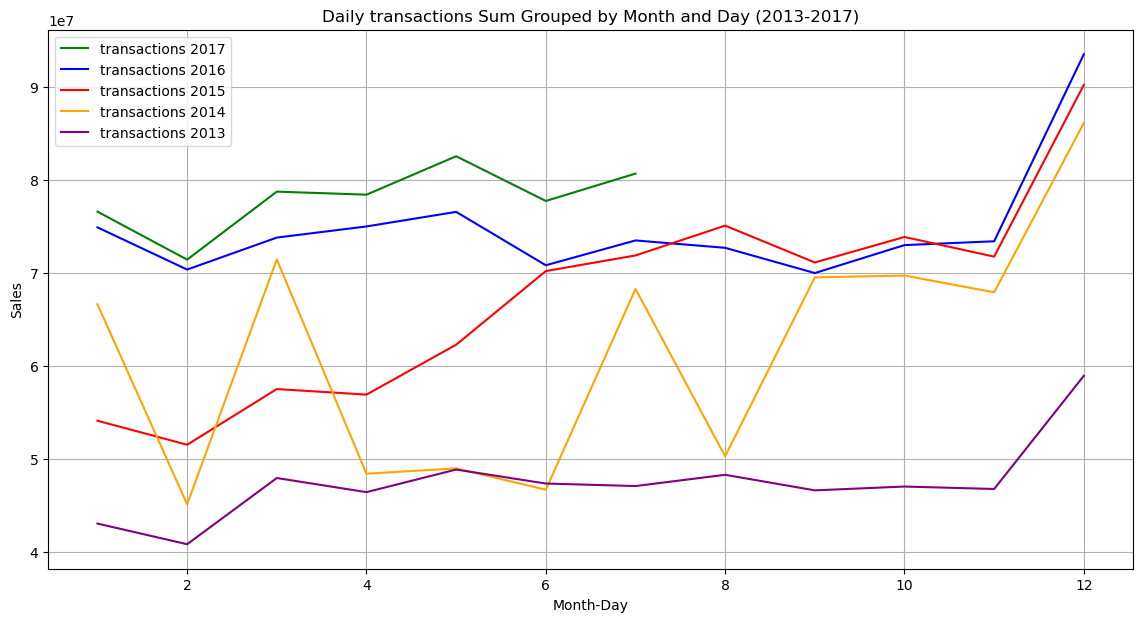

In [282]:
# 날짜별 store_nbr을 groupby 해서 해당 날짜의 sales 합계 계산
train_2017_grouped = train_2017.groupby('month')['transactions'].sum().reset_index()
train_2016_grouped = train_2016.groupby('month')['transactions'].sum().reset_index()
train_2015_grouped = train_2015.groupby('month')['transactions'].sum().reset_index()
train_2014_grouped = train_2014.groupby('month')['transactions'].sum().reset_index()
train_2013_grouped = train_2013.groupby('month')['transactions'].sum().reset_index()

# 날짜별 sales 합계를 나타내는 라인 그래프 그리기
plt.figure(figsize=(14, 7))

plt.plot(train_2017_grouped['month'], train_2017_grouped['transactions'], label='transactions 2017', color='green')
plt.plot(train_2016_grouped['month'], train_2016_grouped['transactions'], label='transactions 2016', color='blue')
plt.plot(train_2015_grouped['month'], train_2015_grouped['transactions'], label='transactions 2015', color='red')
plt.plot(train_2014_grouped['month'], train_2014_grouped['transactions'], label='transactions 2014', color='orange')
plt.plot(train_2013_grouped['month'], train_2013_grouped['transactions'], label='transactions 2013', color='purple')

plt.xlabel('Month-Day')
plt.ylabel('Sales')
plt.title('Daily transactions Sum Grouped by Month and Day (2013-2017)')
plt.legend()
plt.grid(True)
plt.show()

In [283]:

train_2017.to_csv("train_2017.csv", index=False)
train_2016.to_csv("train_2016.csv", index=False)
train_2015.to_csv("train_2015.csv", index=False)
train_2014.to_csv("train_2014.csv", index=False)
train_2013.to_csv("train_2013.csv", index=False)

### Feature Select

In [304]:
train = pd.read_csv("train_2016.csv")
train['date'] = pd.to_datetime(train['date'])

In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530508 entries, 0 to 530507
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       530508 non-null  int64         
 1   date                     530508 non-null  datetime64[ns]
 2   store_nbr                530508 non-null  int64         
 3   family                   530508 non-null  object        
 4   sales                    530508 non-null  float64       
 5   onpromotion              530508 non-null  int64         
 6   weekday                  530508 non-null  int64         
 7   year                     530508 non-null  int64         
 8   month                    530508 non-null  int64         
 9   day                      530508 non-null  int64         
 10  transactions             530508 non-null  float64       
 11  is_holiday               530508 non-null  int64         
 12  type            

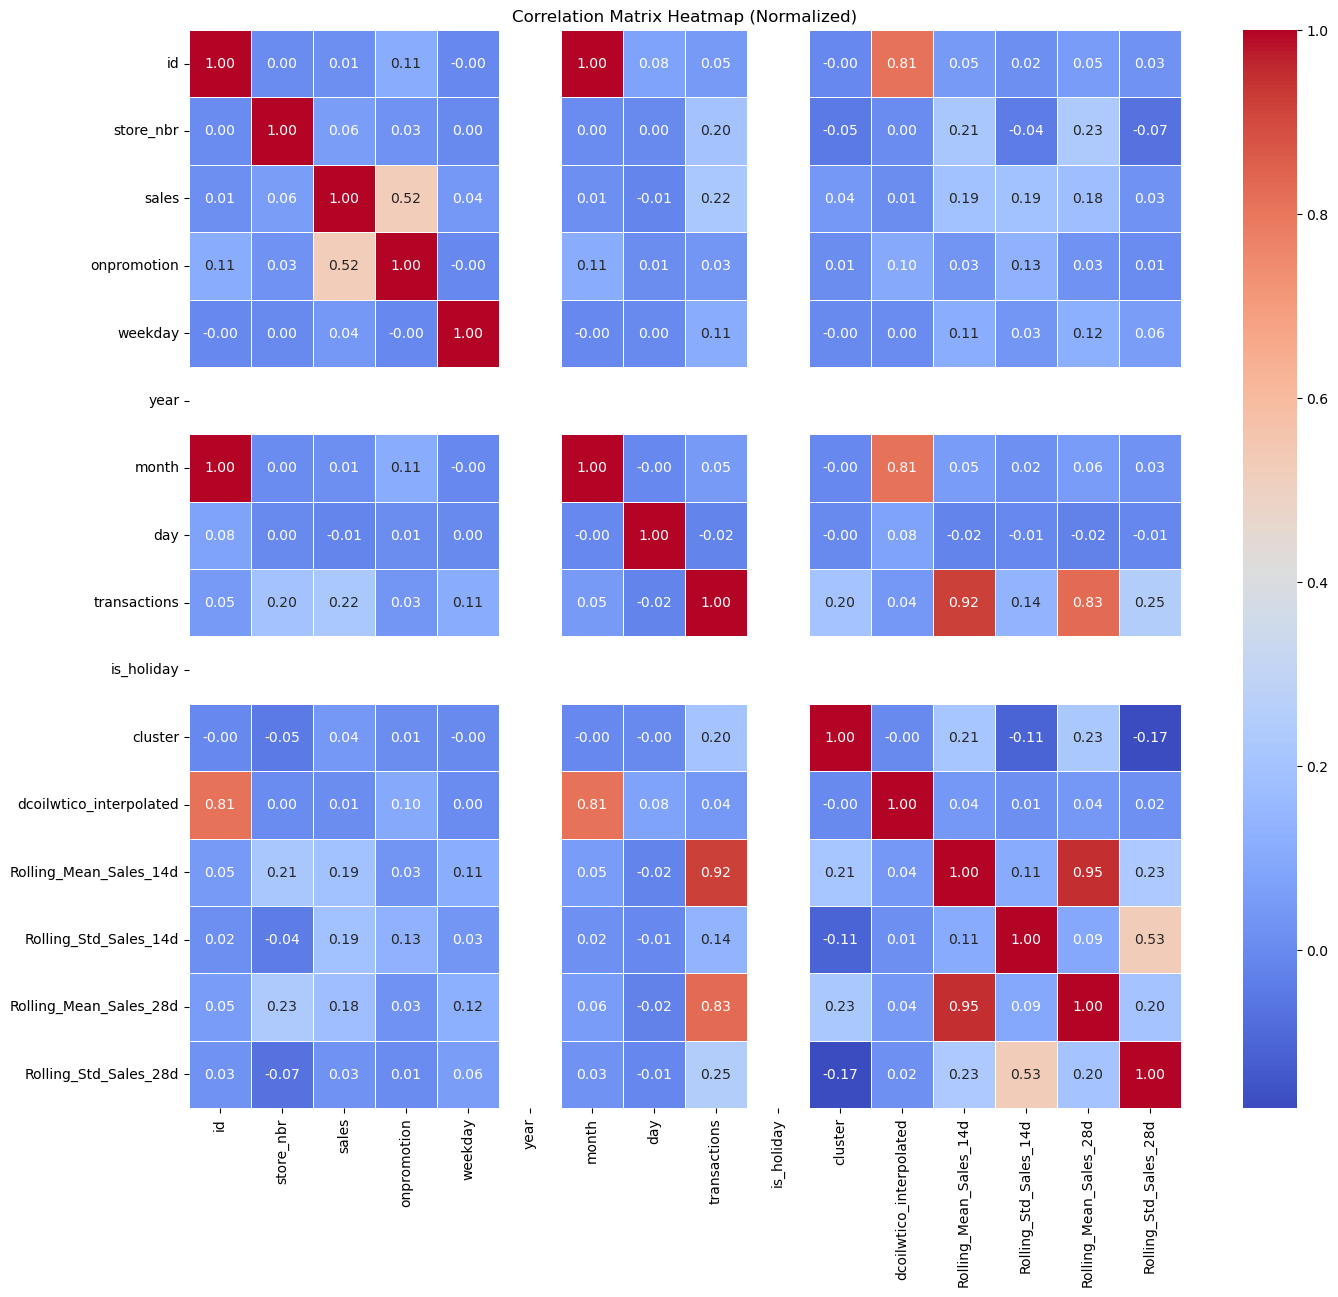

Correlation with sales:
 sales                      1.000
onpromotion                0.523
transactions               0.224
Rolling_Mean_Sales_14d     0.193
Rolling_Std_Sales_14d      0.192
Rolling_Mean_Sales_28d     0.178
store_nbr                  0.058
cluster                    0.041
weekday                    0.041
Rolling_Std_Sales_28d      0.027
month                      0.013
id                         0.012
dcoilwtico_interpolated    0.009
day                       -0.014
year                         NaN
is_holiday                   NaN
Name: sales, dtype: float64


In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 수치형 데이터 열만 추출
numeric_features = train.select_dtypes(include=[np.number]).columns.tolist()

# StandardScaler를 사용하여 데이터 정규화
scaler = StandardScaler()
train[numeric_features] = scaler.fit_transform(train[numeric_features])

# 모든 feature와 sales 간의 상관관계 계산
correlation_matrix = train[numeric_features].corr()


# 히트맵 그리기
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Normalized)')
plt.show()

# Feature Selection - 상관관계 기반 선택
sales_correlation = correlation_matrix['sales'].sort_values(ascending=False)
print("Correlation with sales:\n", sales_correlation)

In [307]:
# 피처 선택을 위한 데이터 전처리
X = pd.get_dummies(train, columns=['store_nbr', 'family', 'weekday', 'type', 'cluster'], drop_first=True)

# 데이터 타입 최적화
for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')
for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('int8')

In [308]:
X.columns

Index(['id', 'date', 'sales', 'onpromotion', 'year', 'month', 'day',
       'transactions', 'is_holiday', 'dcoilwtico_interpolated',
       ...
       'cluster_-0.10106571396190629', 'cluster_0.11498999944160879',
       'cluster_0.33104571284512385', 'cluster_0.547101426248639',
       'cluster_0.763157139652154', 'cluster_0.9792128530556691',
       'cluster_1.1952685664591842', 'cluster_1.4113242798626993',
       'cluster_1.6273799932662143', 'cluster_1.8434357066697296'],
      dtype='object', length=124)

In [309]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
# Feature Selection - 모델 기반 방법
# 1. Random Forest Feature Importance
y = X['sales']
X = X.drop(columns=['sales', 'date'])

rf_model = RandomForestRegressor()
rf_model.fit(X, y)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature family_GROCERY I (0.294546304028062)
2. feature transactions (0.23238083721269162)
3. feature family_BEVERAGES (0.15109186241646486)
4. feature family_PRODUCE (0.07755323346129615)
5. feature Rolling_Mean_Sales_28d (0.048922316259388414)
6. feature Rolling_Mean_Sales_14d (0.04515868156967019)
7. feature family_CLEANING (0.018152270917801562)
8. feature onpromotion (0.01123774642427521)
9. feature family_DAIRY (0.009941446813719135)
10. feature id (0.008646644952421586)
11. feature cluster_1.1952685664591842 (0.008243701747678942)
12. feature day (0.007216750129189803)
13. feature weekday_1.495264079510258 (0.006595331729691313)
14. feature dcoilwtico_interpolated (0.005724239224673427)
15. feature type_D (0.005404433896103116)
16. feature Rolling_Std_Sales_28d (0.005033772102565946)
17. feature cluster_-0.10106571396190629 (0.0040574549231016215)
18. feature Rolling_Std_Sales_14d (0.004018215550054603)
19. feature type_B (0.0034892786021780845)
20. feature t

## test.csv 파일 정리하기

In [310]:
test = pd.read_csv("../data/test.csv")
test['date'] = pd.to_datetime(test['date'])